In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet("cmm_erdos_bootcamp_2020_timeseries.pq")

In [3]:
df.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792


In [4]:
df.tail()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
1090,2019-12-27,2019,12,27,6,1,1,0,8362,3650,3661
1091,2019-12-28,2019,12,28,7,0,0,0,2906,1298,1232
1092,2019-12-29,2019,12,29,1,0,0,0,3024,1357,1349
1093,2019-12-30,2019,12,30,2,1,1,0,7444,3690,3690
1094,2019-12-31,2019,12,31,3,1,1,0,8324,3971,4062


In [5]:
df.describe()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
count,1095.00000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,2018.00000,6.526027,15.720548,3.994521,0.714155,0.693151,0.016438,6209.011872,3134.743379,2950.600913
std,0.81687,3.449427,8.800266,2.001363,0.452022,0.461397,0.127212,2546.338435,1232.288150,1157.136368
min,2017.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,974.000000,701.000000,574.000000
25%,2017.00000,4.000000,8.000000,2.000000,0.000000,0.000000,0.000000,3082.000000,1471.000000,1426.000000
50%,2018.00000,7.000000,16.000000,4.000000,1.000000,1.000000,0.000000,7000.000000,3646.000000,3408.000000
75%,2019.00000,10.000000,23.000000,6.000000,1.000000,1.000000,0.000000,8353.000000,4046.000000,3846.000000
max,2019.00000,12.000000,31.000000,7.000000,1.000000,1.000000,1.000000,10474.000000,5152.000000,4963.000000


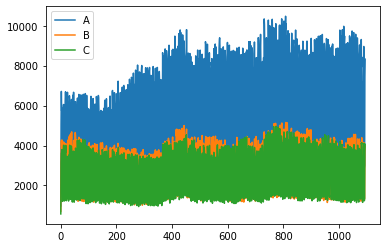

In [6]:
plt.plot(df['volume_A'],label="A")
plt.plot(df['volume_B'],label="B")
plt.plot(df['volume_C'],label="C")
plt.legend()

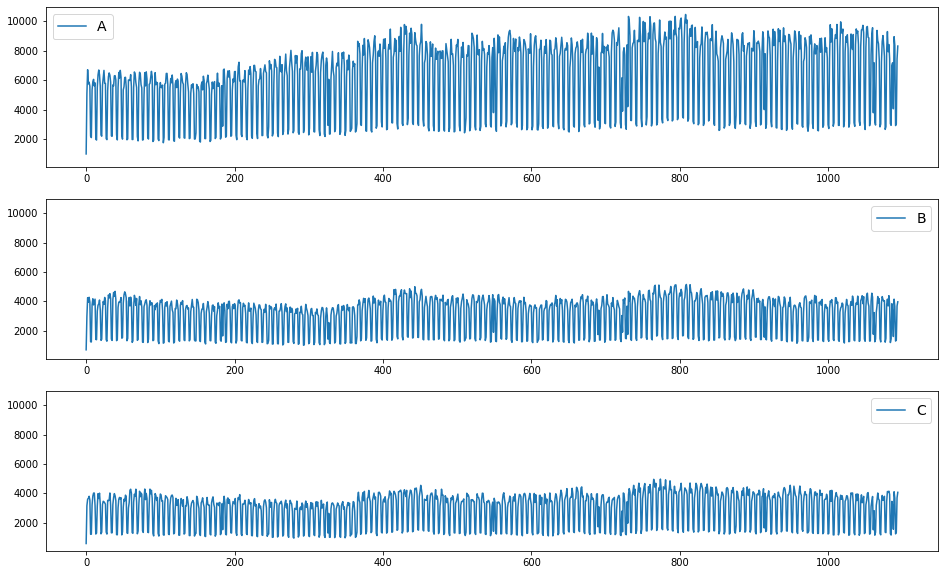

In [7]:
fig,ax = plt.subplots(3,1,figsize = (16,10),sharey=True)

ax[0].plot(df['volume_A'],label="A")
ax[1].plot(df['volume_B'],label="B")
ax[2].plot(df['volume_C'],label="C")

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [8]:
df.corr()['volume_A'].sort_values()

is_holiday       -0.152173
calendar_day      0.006083
calendar_month    0.008256
day_of_week       0.034117
calendar_year     0.305712
is_weekday        0.884200
is_workday        0.903119
volume_B          0.928147
volume_C          0.933327
volume_A          1.000000
Name: volume_A, dtype: float64

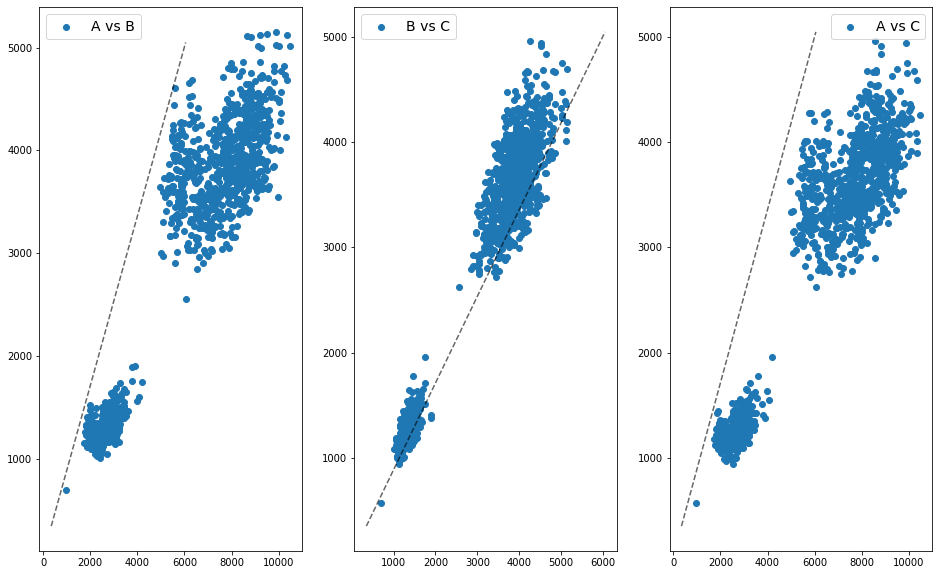

In [9]:
fig,ax = plt.subplots(1,3,figsize = (16,10),sharey=False)

ax[0].scatter(df['volume_A'],df['volume_B'],label="A vs B")
ax[1].scatter(df['volume_B'],df['volume_C'],label="B vs C")
ax[2].scatter(df['volume_A'],df['volume_C'],label="A vs C")

ax[0].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)
ax[1].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)
ax[2].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

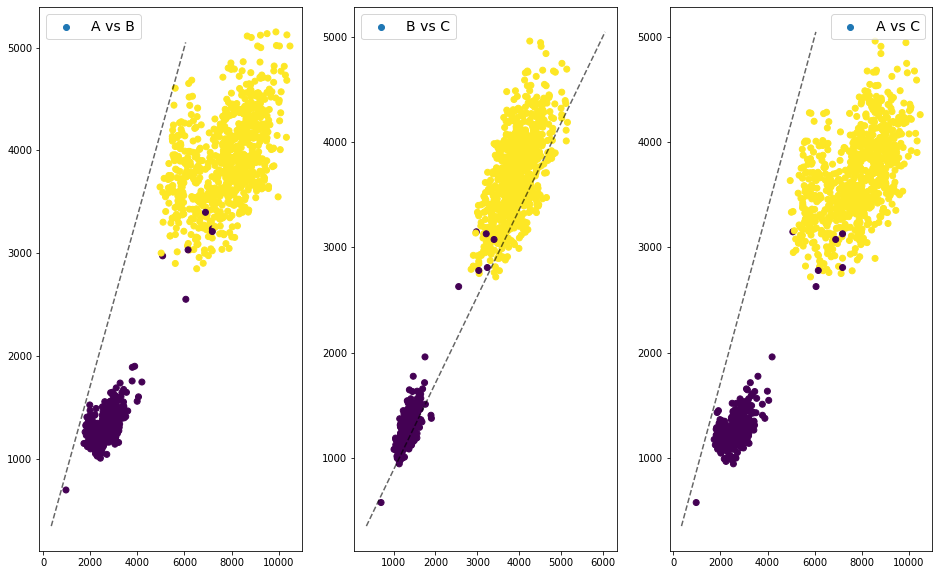

In [10]:
fig,ax = plt.subplots(1,3,figsize = (16,10),sharey=False)

ax[0].scatter(df['volume_A'],df['volume_B'],label="A vs B",c=df['is_workday'])
ax[1].scatter(df['volume_B'],df['volume_C'],label="B vs C",c=df['is_workday'])
ax[2].scatter(df['volume_A'],df['volume_C'],label="A vs C",c=df['is_workday'])

ax[0].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)
ax[1].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)
ax[2].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [11]:
# This function makes a lag_df 
# for easy plotting
def make_lag_df(df,feature,lag):
    lag_df = df.copy()
    lag_df[feature + '_lag'] = np.nan
    
    lag_df.loc[lag:,feature + '_lag'] = lag_df.loc[0:len(lag_df)-(lag+1),feature].values
    return lag_df

In [12]:
# A function to make our plotting easier
def plot_lag(df,feature,lag,lu,up,color_feature,ax=None):
    df = make_lag_df(df,feature,lag).dropna()
    if ax:
        ax.scatter(df[feature+'_lag'],df[feature],c=df[color_feature])

        ax.plot(np.linspace(lu,up,100),
                np.linspace(lu,up,100),
               'k--', alpha = .6)

        ax.set_title("lag = " + str(lag),fontsize=12)
    else:
        plt.scatter(df[feature+'_lag'],df[feature])

        plt.plot(np.linspace(lu,up,100),
                np.linspace(lu,up,100),
               'k--', alpha = .6)

        plt.show()

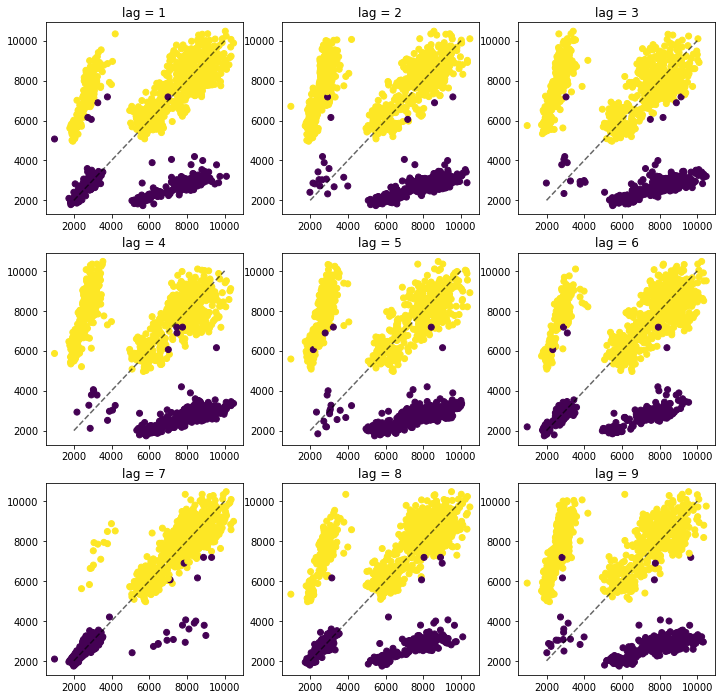

In [13]:
# we'll make lag plot for lag = 1 to 9

fig,ax = plt.subplots(3,3,
                      figsize = (12,12))

for i in range(1,10):
    plot_lag(df,'volume_A',i,2000,10000,'is_workday',ax[(i-1)//3, (i-1)%3])

plt.show()

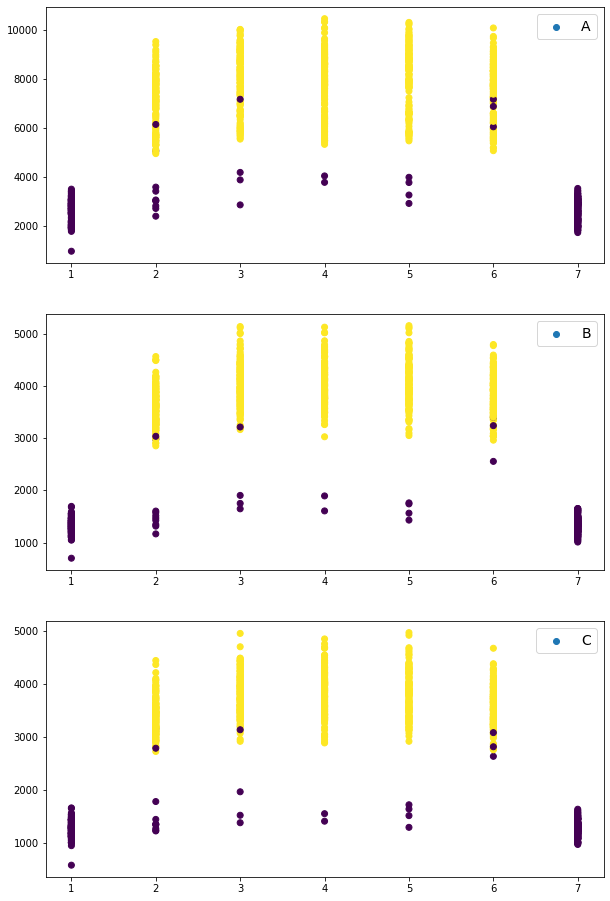

In [14]:
fig,ax = plt.subplots(3,1,figsize = (10,16))

ax[0].scatter(df['day_of_week'] ,df['volume_A'],label="A",c=df['is_workday'])
ax[1].scatter(df['day_of_week'] ,df['volume_B'],label="B",c=df['is_workday'])
ax[2].scatter(df['day_of_week'] ,df['volume_C'],label="C",c=df['is_workday'])

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [15]:
filter_data = df.drop(df[df['is_workday'] == 0 ].index)

In [16]:
filter_data.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792
5,2017-01-06,2017,1,6,6,1,1,0,5586,3956,3530
8,2017-01-09,2017,1,9,2,1,1,0,5337,3757,3214


In [17]:
filter_data.corr()['volume_A'].sort_values()

calendar_day     -0.009995
day_of_week       0.073034
calendar_month    0.073568
volume_B          0.479409
volume_C          0.531147
calendar_year     0.785429
volume_A          1.000000
is_weekday             NaN
is_workday             NaN
is_holiday             NaN
Name: volume_A, dtype: float64

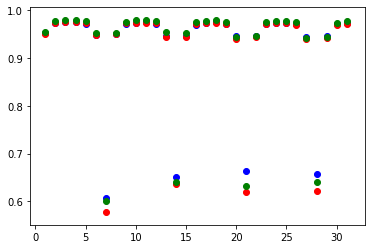

In [18]:
for i in range(1,32):
    df_diff = df.diff(periods=i)
    plt.scatter(i,df_diff.corr()['volume_A']['volume_B'],c='b')
    plt.scatter(i,df_diff.corr()['volume_A']['volume_C'],c='r')
    plt.scatter(i,df_diff.corr()['volume_C']['volume_B'],c='g')

plt.show()